In [1]:
#Import the data

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import csv

# Define the file path

path_raw_recipes = '/content/drive/My Drive/Master_Thesis/Food.com_RAW_recipes.csv'
path_raw_interactions = '/content/drive/My Drive/Master_Thesis/Food.com_RAW_interactions.csv'


# Create an empty list to store the recipe data
data_recipes = []

# Open and read the file line-by-line
with open(path_raw_recipes, newline='', encoding='utf-8') as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
      data_recipes.append(row)

# Create the DataFrame with specified column names
df_recipes = pd.DataFrame(data_recipes, columns=["name", "recipe_id", "minutes", "contributor_id", "submitted", "tags", "nutrition", "n_steps", "steps", "description", "ingredients", "n_ingredients"])
df_recipes = df_recipes.drop(0).reset_index(drop=True)


# Display a sample of the dataset to check the structure
print(df_recipes.head())


# Create an empty list to store the interaction data
data_interactions = []

# Open and read the file line-by-line
with open(path_raw_interactions, newline='', encoding='utf-8') as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
      data_interactions.append(row)

# Create the DataFrame with specified column names
df_interactions = pd.DataFrame(data_interactions, columns=["user_id", "recipe_id", "date", "rating", "review"])
df_interactions = df_interactions.drop(0).reset_index(drop=True)


# Display a sample of the dataset to check the structure
print(df_interactions.head())

                                         name recipe_id minutes  \
0  arriba   baked winter squash mexican style    137739      55   
1            a bit different  breakfast pizza     31490      30   
2                   all in the kitchen  chili    112140     130   
3                          alouette  potatoes     59389      45   
4          amish  tomato ketchup  for canning     44061     190   

  contributor_id   submitted  \
0          47892  2005-09-16   
1          26278  2002-06-17   
2         196586  2005-02-25   
3          68585  2003-04-14   
4          41706  2002-10-25   

                                                tags  \
0  ['60-minutes-or-less', 'time-to-make', 'course...   
1  ['30-minutes-or-less', 'time-to-make', 'course...   
2  ['time-to-make', 'course', 'preparation', 'mai...   
3  ['60-minutes-or-less', 'time-to-make', 'course...   
4  ['weeknight', 'time-to-make', 'course', 'main-...   

                                    nutrition n_steps  \
0       [5

In [3]:
import pandas as pd

df_merge = pd.merge(df_recipes, df_interactions, on="recipe_id")
df_merge.drop_duplicates(subset=['steps', 'description'], inplace=True)
df_merge.reset_index(drop=True, inplace=True)
df = df_merge[["ingredients", "steps", "rating"]]
print(df)

                                              ingredients  \
0       ['winter squash', 'mexican seasoning', 'mixed ...   
1       ['prepared pizza crust', 'sausage patty', 'egg...   
2       ['ground beef', 'yellow onions', 'diced tomato...   
3       ['spreadable cheese with garlic and herbs', 'n...   
4       ['tomato juice', 'apple cider vinegar', 'sugar...   
...                                                   ...   
231595  ['celery', 'onion', 'green sweet pepper', 'gar...   
231596  ['paprika', 'salt', 'garlic powder', 'onion po...   
231597  ['hard-cooked eggs', 'mayonnaise', 'dijon must...   
231598  ['butter', 'eagle brand condensed milk', 'ligh...   
231599  ['granulated sugar', 'shortening', 'eggs', 'fl...   

                                                    steps rating  
0       ['make a choice and proceed with recipe', 'dep...      5  
1       ['preheat oven to 425 degrees f', 'press dough...      0  
2       ['brown ground beef in large pot', 'add choppe...      4  

In [ ]:
from sklearn.utils import resample

# Separate the dataset into classes
class_dfs = {rating: df[df['rating'] == rating] for rating in df['rating'].unique()}

# Print the unique values in the 'rating' column to ensure you're working with the correct keys
print("Unique ratings in the dataset:", df['rating'].unique())

# Define target size for balancing
# Calculate the target size dynamically based on the classes available
rating_counts = [len(class_df) for class_df in class_dfs.values()]
minority_size = max(rating_counts)  # Maximum size from the minority classes
majority_size = min(rating_counts)  # Minimum size from the majority classes
target_size = (minority_size + majority_size) // 2  # You can adjust this as needed

# Balance each class
balanced_dfs = []
for rating, class_df in class_dfs.items():
    if len(class_df) < target_size:
        # Oversample minority classes
        balanced_class_df = resample(
            class_df,
            replace=True,
            n_samples=target_size,
            random_state=42
        )
    else:
        # Undersample majority classes
        balanced_class_df = resample(
            class_df,
            replace=False,
            n_samples=target_size,
            random_state=42
        )
    balanced_dfs.append(balanced_class_df)

# Combine all classes
df_balanced_final = pd.concat(balanced_dfs)

# Shuffle the dataset
df_balanced_final = df_balanced_final.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the new class distribution
print(df_balanced_final['rating'].value_counts())

Unique ratings in the dataset: ['5' '0' '4' '2' '3' '1']
rating
4    81132
1    81132
5    81132
3    81132
2    81132
0    81132
Name: count, dtype: int64


Vectorizer saved


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
1448/1448 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - loss: 2.4304 - mae: 0.2394 - val_loss: 0.0542 - val_mae: 0.1461 - learning_rate: 0.0010
Epoch 2/10
1448/1448 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - loss: 0.4427 - mae: 0.1523 - val_loss: 0.0536 - val_mae: 0.1404 - learning_rate: 0.0010
Epoch 3/10
1448/1448 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - loss: 0.3652 - mae: 0.1411 - val_loss: 0.0535 - val_mae: 0.1383 - learning_rate: 0.0010
Epoch 4/10
1448/1448 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 0.3621 - mae: 0.1400 - val_loss: 0.0531 - val_mae: 0.1407 - learning_rate: 0.0010
Epoch 5/10
1448/1448 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - loss: 0.3597 - mae: 0.1397 - val_loss: 0.0533 - val_mae: 0.1406 - learning_rate: 0.0010
Epoch 6/10
1448/1448 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 0.3597 - mae: 0.1394 - val_loss: 0.0539 - val_mae: 0.1373 - learning_rate: 0.0010
Epoch 7/10
1448/1448 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 0.3593 - mae: 0.1391 - val_loss: 0.0533 - val_mae: 0.1409 - 

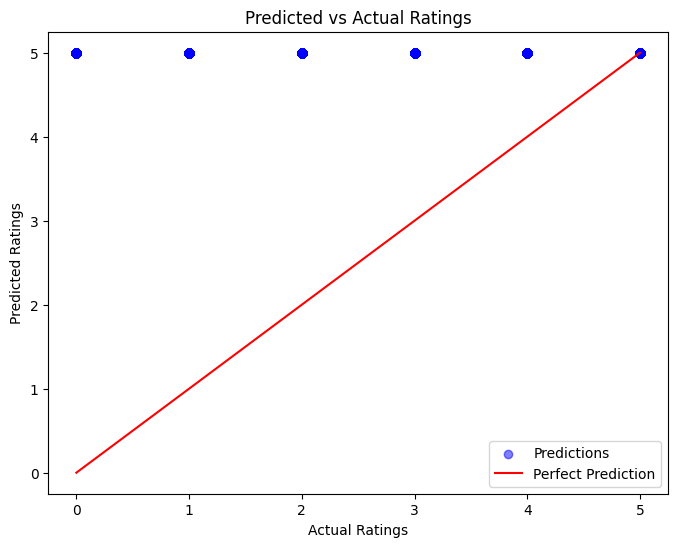

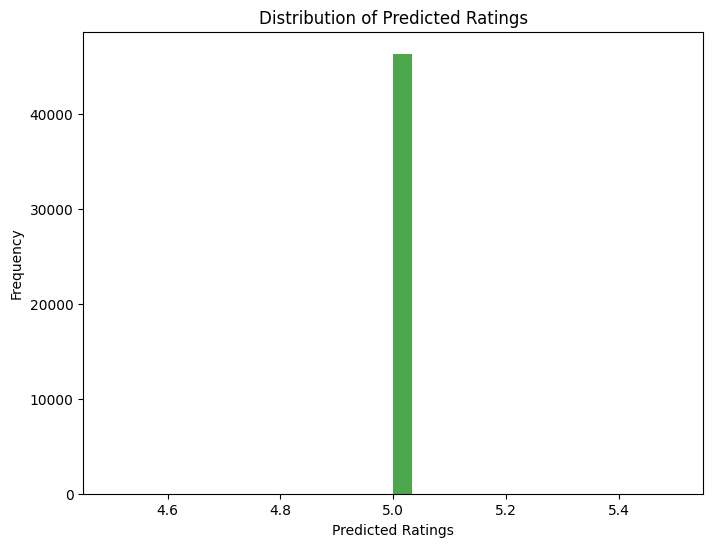

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import TextVectorization
from sklearn.utils.class_weight import compute_class_weight

# Load dataset (Assuming df is already defined)
# Replace `data_dict` with your actual data if not already a DataFrame
def format_input(ingredients, steps):
    return f"<ingredients> {ingredients} </ingredients>, <steps> {steps} </steps>"

# Format dataset (assume `df` contains your data)
steps_and_ingredients = [
    format_input(ingredients, steps)
    for ingredients, steps in zip(df['ingredients'], df['steps'])
]

save_path = '/content/drive/My Drive/Master_Thesis/vectorizer_steps_ingredients.npy'

ratings = df['rating']

# Configure TextVectorization for word embeddings
max_vocab_size = 10000  # Define max vocabulary size
max_length = 100  # Max sequence length

vectorizer = TextVectorization(max_tokens=max_vocab_size, output_sequence_length=max_length, output_mode='int')
vectorizer.adapt(steps_and_ingredients)  # Fit the vectorizer to the combined text data

# Vectorize the text data
X = vectorizer(steps_and_ingredients).numpy()
np.save(save_path, X)
print("Vectorizer saved")

# Convert ratings to a numpy array and scale
y = np.array(ratings)
scaler = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

def build_model(input_shape):

  model = Sequential([
      Embedding(input_dim=max_vocab_size, output_dim=64, input_length=max_length),  # Word embeddings
      Bidirectional(GRU(32, return_sequences=False, dropout=0.4)),  # GRU with dropout
      Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),  # L2 regularization
      Dropout(0.5),
      Dense(1, activation='linear')  # Linear activation for regression
  ])
  return model

def train_and_evaluate_model(model, X_train, y_train, X_val, y_val):
    # Compile the model
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    # Early stopping and learning rate reduction callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train.flatten())
    class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

    # Train the model
    model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=10,  # Set number of epochs
        batch_size=128,
        class_weight=class_weights_dict,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Generate predictions
    y_pred = model.predict(X_val)

    return model, y_pred

# Build, Train, and Save the Model
model = build_model(X_train.shape[1])
model, y_pred = train_and_evaluate_model(model, X_train, y_train, X_val, y_val)
model.save('/content/drive/My Drive/Master_Thesis/vectorizer_january_model.keras')
print("model saved")

# Rescale predictions back to original rating scale (0-5)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_pred_integers = np.round(y_pred_rescaled).clip(0, 5).astype(int)

y_val_rescaled = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()

# Print the first 10 predicted ratings
print("First 10 predicted ratings (after inverse scaling):")
print(y_pred_integers[:10].flatten())

# Plot results
import matplotlib.pyplot as plt

# Plot 1: Scatter Plot (Predicted vs Actual Ratings)
plt.figure(figsize=(8, 6))
plt.scatter(y_val_rescaled, y_pred_integers, alpha=0.5, color='blue', label='Predictions')
plt.plot([0, 5], [0, 5], color='red', label='Perfect Prediction')  # Perfect prediction line
plt.title('Predicted vs Actual Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend()
plt.show()

# Plot 2: Histogram of Predicted Ratings
plt.figure(figsize=(8, 6))
plt.hist(y_pred_integers, bins=30, color='green', alpha=0.7)
plt.title('Distribution of Predicted Ratings')
plt.xlabel('Predicted Ratings')
plt.ylabel('Frequency')
plt.show()

# Plot 3: Error Distribution (Actual - Predicted)
better_prediction_errors = y_val_rescaled - y_pred_integers

plt.figure(figsize=(8, 6))
plt.hist(better_prediction_errors, bins=30, color='orange', alpha=0.7)
plt.title('Prediction Error Distribution')
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/20
2895/2895 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 3.3914 - mae: 1.4343 - val_loss: 0.9679 - val_mae: 0.8108 - learning_rate: 1.0000e-05
Epoch 2/20
2895/2895 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 2.2117 - mae: 1.1358 - val_loss: 0.6836 - val_mae: 0.6645 - learning_rate: 1.0000e-05
Epoch 3/20
2895/2895 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 1.8762 - mae: 1.0178 - val_loss: 0.5974 - val_mae: 0.6175 - learning_rate: 1.0000e-05
Epoch 4/20
2895/2895 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 1.6530 - mae: 0.9553 - val_loss: 0.5179 - val_mae: 0.5643 - learning_rate: 1.0000e-05
Epoch 5/20
2895/2895 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 1.4908 - mae: 0.9053 - val_loss: 0.4740 - val_mae: 0.5358 - learning_rate: 1.0000e-05
Epoch 6/20
2895/2895 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 1.3898 - mae: 0.8799 - val_loss: 0.5077 - val_mae: 0.5721 - learning_rate: 1.0000e-05
Epoch 7/20
2895/2895 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 1.3036 - mae: 0.8431 - val_loss: 0.4472 - v

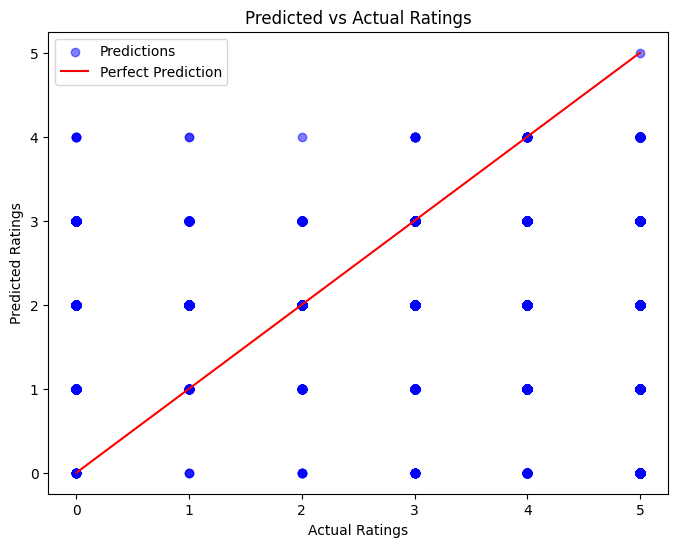

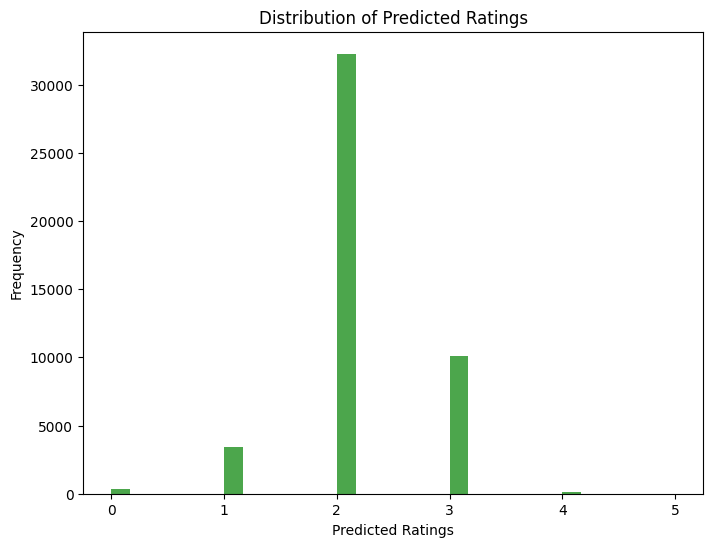

In [5]:
"""
Stella model but with vectorized data
"""

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Add, Activation, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
from tensorflow.keras import regularizers
from sklearn.utils.class_weight import compute_sample_weight
from tensorflow.keras.losses import MeanSquaredError

np.random.seed(123)

ratings = df['rating']
vectorizer = np.load('/content/drive/My Drive/Master_Thesis/vectorizer_steps_ingredients.npy')

# Convert ratings to a numpy array and scale
y = np.array(ratings)
scaler = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

# Split the data
X_train, X_val, y_train, y_val = train_test_split(vectorizer, y_scaled, test_size=0.2, random_state=42)


# Residual Block with L2 Regularization
def residual_block(x, units, l2_reg=1e-4):
    shortcut = x
    x = Dense(units, activation=None, kernel_regularizer=regularizers.l2(l2_reg))(x)
    x = LeakyReLU(alpha=0.3)(x)  # Using LeakyReLU activation instead of ReLU
    x = BatchNormalization()(x)
    x = Dense(units, kernel_regularizer=regularizers.l2(l2_reg))(x)
    x = Add()([x, shortcut])
    x = LeakyReLU(alpha=0.3)(x)  # Using LeakyReLU activation here as well
    return x

# Build the Neural Network Model
def build_model(input_shape):
    inputs = Input(shape=(input_shape,))
    x = Dense(512, activation=None, kernel_regularizer=regularizers.l2(1e-4))(inputs)
    x = LeakyReLU(alpha=0.3)(x)  # Using LeakyReLU activation
    x = residual_block(x, 512)
    x = Dropout(0.5)(x)
    x = Dense(256, activation=None, kernel_regularizer=regularizers.l2(1e-4))(x)
    x = LeakyReLU(alpha=0.3)(x)  # Using LeakyReLU activation
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    outputs = Dense(1, activation='linear')(x)
    model = Model(inputs, outputs)
    return model

# Train and Evaluate Model
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val):
    optimizer = Adam(learning_rate=1e-5)  # Lower learning rate
    model.compile(optimizer=optimizer, loss=Huber(), metrics=['mae'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

    # Compute sample weights for imbalanced classes
    sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

    # Modify the loss function to use weighted loss
    model.compile(optimizer=optimizer, loss=MeanSquaredError(), metrics=['mae'])
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=20,
        batch_size=64,
        sample_weight=sample_weights,  # Include sample weights during training
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    val_loss, val_mae = model.evaluate(X_val, y_val, verbose=0)
    print(f"Validation Loss: {val_loss:.4f}, Validation MAE: {val_mae:.4f}")

    y_pred = model.predict(X_val)

    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print(f"RMSE: {rmse:.4f}")

    return model, y_pred

# Build, Train, and Save the Model
model = build_model(X_train.shape[1])
model, y_pred = train_and_evaluate_model(model, X_train, y_train, X_val, y_val)

# Rescale predictions back to original rating scale (0-5)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_pred_integers = np.round(y_pred_rescaled).clip(0, 5).astype(int)

y_val_rescaled = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()


# Print the first 10 predicted ratings
print("First 10 predicted ratings (after inverse scaling):")
print(y_pred_integers[:10].flatten())


# Plot results
import matplotlib.pyplot as plt

# Plot 1: Scatter Plot (Predicted vs Actual Ratings)
plt.figure(figsize=(8, 6))
plt.scatter(y_val_rescaled, y_pred_integers, alpha=0.5, color='blue', label='Predictions')
plt.plot([0, 5], [0, 5], color='red', label='Perfect Prediction')  # Perfect prediction line
plt.title('Predicted vs Actual Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend()
plt.show()

# Plot 2: Histogram of Predicted Ratings
plt.figure(figsize=(8, 6))
plt.hist(y_pred_integers, bins=30, color='green', alpha=0.7)
plt.title('Distribution of Predicted Ratings')
plt.xlabel('Predicted Ratings')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
2895/2895 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 3.6108 - mae: 1.4610 - val_loss: 0.8053 - val_mae: 0.7128 - learning_rate: 1.0000e-05
Epoch 2/50
2895/2895 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 2.2089 - mae: 1.1505 - val_loss: 0.5202 - val_mae: 0.5397 - learning_rate: 1.0000e-05
Epoch 3/50
2895/2895 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 1.8294 - mae: 1.0188 - val_loss: 0.4784 - val_mae: 0.5155 - learning_rate: 1.0000e-05
Epoch 4/50
2895/2895 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 1.6179 - mae: 0.9428 - val_loss: 0.4422 - val_mae: 0.4983 - learning_rate: 1.0000e-05
Epoch 5/50
2895/2895 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 1.4842 - mae: 0.9057 - val_loss: 0.4083 - val_mae: 0.4757 - learning_rate: 1.0000e-05
Epoch 6/50
2895/2895 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 1.3755 - mae: 0.8705 - val_loss: 0.3551 - val_mae: 0.4324 - learning_rate: 1.0000e-05
Epoch 7/50
2895/2895 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 1.3235 - mae: 0.8442 - val_loss: 0.3714 - v

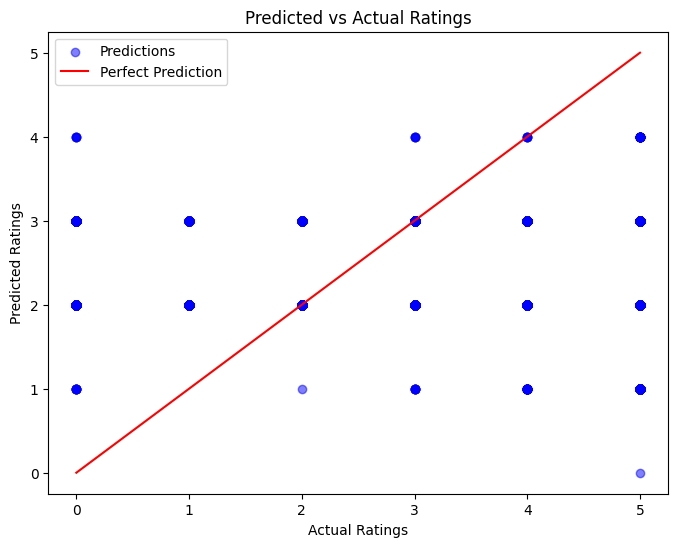

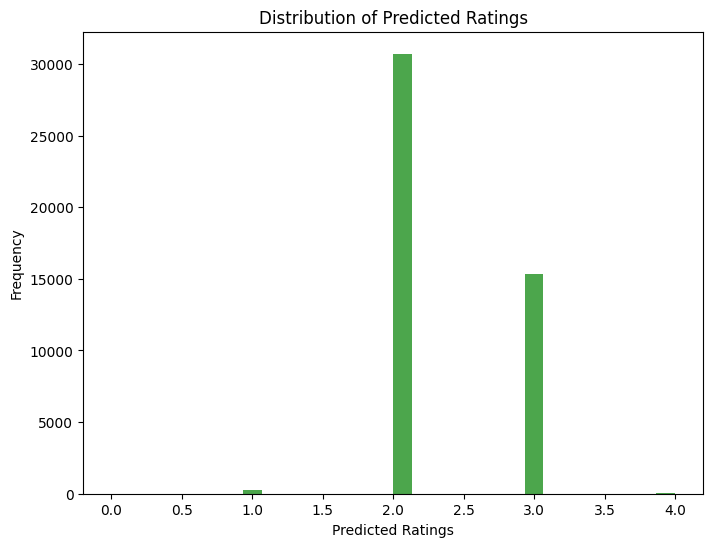

In [ ]:
"""
Bert embedding
"""

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Add, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber, MeanSquaredError
from tensorflow.keras import regularizers
from sklearn.utils.class_weight import compute_sample_weight

np.random.seed(123)

ratings = df['rating']
vectorizer = np.load('/content/drive/My Drive/Master_Thesis/vectorizer_steps_ingredients.npy')

# Convert ratings to a numpy array and scale
y = np.array(ratings)
scaler = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

# Split the data
X_train, X_val, y_train, y_val = train_test_split(vectorizer, y_scaled, test_size=0.2, random_state=42)


# Residual Block with L2 Regularization
def residual_block(x, units, l2_reg=1e-4):
    shortcut = x
    x = Dense(units, activation=None, kernel_regularizer=regularizers.l2(l2_reg))(x)
    x = LeakyReLU(alpha=0.3)(x)  # Using LeakyReLU activation instead of ReLU
    x = BatchNormalization()(x)
    x = Dense(units, kernel_regularizer=regularizers.l2(l2_reg))(x)
    x = Add()([x, shortcut])
    x = LeakyReLU(alpha=0.3)(x)  # Using LeakyReLU activation here as well
    return x

# Build the Neural Network Model
def build_model(input_shape):
    inputs = Input(shape=(input_shape,))
    x = Dense(512, activation=None, kernel_regularizer=regularizers.l2(1e-4))(inputs)
    x = LeakyReLU(alpha=0.3)(x)  # Using LeakyReLU activation
    x = residual_block(x, 512)
    x = Dropout(0.5)(x)
    x = Dense(256, activation=None, kernel_regularizer=regularizers.l2(1e-4))(x)
    x = LeakyReLU(alpha=0.3)(x)  # Using LeakyReLU activation
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    outputs = Dense(1, activation='linear')(x)  # Regression output
    model = Model(inputs, outputs)
    return model

# Train and Evaluate Model
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val):
    optimizer = Adam(learning_rate=1e-5)  # Lower learning rate
    model.compile(optimizer=optimizer, loss=Huber(), metrics=['mae'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

    # Compute sample weights for imbalanced classes
    sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

    # Modify the loss function to use weighted loss
    model.compile(optimizer=optimizer, loss=MeanSquaredError(), metrics=['mae'])
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=50,
        batch_size=64,
        sample_weight=sample_weights,  # Include sample weights during training
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    val_loss, val_mae = model.evaluate(X_val, y_val, verbose=0)
    print(f"Validation Loss: {val_loss:.4f}, Validation MAE: {val_mae:.4f}")

    y_pred = model.predict(X_val)

    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print(f"RMSE: {rmse:.4f}")

    return model, y_pred

# Build, Train, and Save the Model
model = build_model(X_train.shape[1])
model, y_pred = train_and_evaluate_model(model, X_train, y_train, X_val, y_val)

# Rescale predictions back to original rating scale (0-5)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_pred_integers = np.round(y_pred_rescaled).clip(0, 5).astype(int)

y_val_rescaled = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()

# Print the first 10 predicted ratings
print("First 10 predicted ratings (after inverse scaling):")
print(y_pred_integers[:10].flatten())

# Plot results
import matplotlib.pyplot as plt

# Plot 1: Scatter Plot (Predicted vs Actual Ratings)
plt.figure(figsize=(8, 6))
plt.scatter(y_val_rescaled, y_pred_integers, alpha=0.5, color='blue', label='Predictions')
plt.plot([0, 5], [0, 5], color='red', label='Perfect Prediction')  # Perfect prediction line
plt.title('Predicted vs Actual Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend()
plt.show()

# Plot 2: Histogram of Predicted Ratings
plt.figure(figsize=(8, 6))
plt.hist(y_pred_integers, bins=30, color='green', alpha=0.7)
plt.title('Distribution of Predicted Ratings')
plt.xlabel('Predicted Ratings')
plt.ylabel('Frequency')
plt.show()

# Plot 3: Error Distribution (Actual - Predicted)
better_prediction_errors = y_val_rescaled - y_pred_integers

plt.figure(figsize=(8, 6))
plt.hist(better_prediction_errors, bins=30, color='orange', alpha=0.7)
plt.title('Prediction Error Distribution')
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
!pip install openai==0.28

In [ ]:
import openai
# Set up your API key
openai.api_key = 'API key'  # Replace with your actual API key

def generate_gpt4_response(prompt):
    try:
        # Use ChatCompletion for chat-based models like gpt-4-turbo
        response = openai.ChatCompletion.create(
            model="gpt-4o-mini",
            messages=[{"role": "user", "content": prompt}],
            max_tokens=100,       # Adjust as needed
            temperature=0.7       # Adjust as needed
        )
        # Return the content of the response
        return response['choices'][0]['message']['content']
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage
user_prompt = "Explain the difference between supervised and unsupervised learning."
response = generate_gpt4_response(user_prompt)
print("GPT-4 Response:", response)

GPT-4 Response: Supervised and unsupervised learning are two primary types of machine learning paradigms, and they differ mainly in the way they utilize data.

### Supervised Learning:
1. **Definition**: In supervised learning, the algorithm is trained on a labeled dataset, meaning that each training example is paired with an output label or target value. The model learns to map inputs to the correct outputs.

2. **Goal**: The main goal is to make predictions or classifications based on new, unseen data.


In [ ]:
import numpy as np
import openai
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense
from sklearn.utils.class_weight import compute_sample_weight
from transformers import BertTokenizer, BertModel
import torch
from concurrent.futures import ThreadPoolExecutor, as_completed
import time
import random
from tensorflow.keras.layers import TextVectorization



# Scale the ratings to a 0-1 range
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(np.array([0, 5]).reshape(-1, 1))  # Example scaler fitting (adjust based on data)

# Load trained model
model = load_model('/content/drive/My Drive/Master_Thesis/vectorizer_january_model.keras', custom_objects={'mse': MeanSquaredError()})

# Function to get vectorized embeddings from text
def get_vectorized_embedding_from_recipe(recipe):
    """Retrieve the vectorized embedding for a given recipe (text, index, or embedding)."""
    # Configure TextVectorization for word embeddings
    max_vocab_size = 10000  # Define max vocabulary size
    max_length = 100  # Max sequence length
    vectorizer = TextVectorization(max_tokens=max_vocab_size, output_sequence_length=max_length, output_mode='int')
    vectorizer.adapt(recipe)  # Fit the vectorizer to the combined text data
    # Vectorize the text data
    X = vectorizer(recipe).numpy()
    return X

# Batch prediction for recipes
def batch_predict_ratings(recipes, model, scaler):
    """Batch predict ratings for a list of recipes."""
    embeddings = np.array([get_vectorized_embedding_from_recipe(recipe) for recipe in recipes])
    predictions_scaled = model.predict(embeddings)
    y_pred_rescaled = scaler.inverse_transform(predictions_scaled).flatten()
    y_pred_integers = np.round(y_pred_rescaled).clip(0, 5).astype(int)
    return y_pred_integers

# Generate recipes with targeted improvements
def generate_recipe_with_heuristics(base_recipe, base_score, heuristics, num_recipes=5, max_retries=5):
    """Generate recipes with targeted improvements."""
    prompt = f"You are a world-class culinary innovator. Your task is to create a single, refined, and innovative recipe that scores higher than {base_score}. Avoid sub-dishes like side salads or multiple sauces. Instead, craft a single cohesive dish with bold, unique flavors and modern cooking techniques. Focus on one standout main dish that could win in a high-stakes cooking competition. Use creative combinations of ingredients, unique textures, and modern cooking techniques to make it unforgettable. Keep the ingredients list short and impactful, and limit the instructions to essential, clear, and concise steps. Your recipe must fit within 512 tokens. Base recipe: {base_recipe}. Use these guiding principles: {heuristics}. Aim for a score of at least 4.8."

    for attempt in range(max_retries):
        try:
            response = openai.ChatCompletion.create(
                model="gpt-4o-mini",
                messages=[{"role": "user", "content": prompt}],
                max_tokens=512,
                temperature=0.8
            )
            return response['choices'][0]['message']['content'].strip()
        except openai.error.OpenAIError as e:
            print(f"Attempt {attempt + 1} failed with error: {e}. Retrying...")
            time.sleep(2 + random.uniform(0, 2))  # Wait 2-4 seconds before retrying
        except Exception as e:
            print(f"Unexpected error: {e}. Retrying...")
            time.sleep(2 + random.uniform(0, 2))
    print(f"Failed to generate recipe after {max_retries} attempts.")
    return None

# Generate recipes in parallel
def generate_recipes_in_parallel(base_recipe, base_score, recipes_per_iteration):
    """Generate a larger number of recipes in parallel with high creativity."""
    with ThreadPoolExecutor() as executor:
        futures = [
            executor.submit(generate_recipe_with_heuristics, base_recipe, base_score, [], 1)
            for _ in range(recipes_per_iteration)
        ]
        return [future.result() for future in as_completed(futures) if future.result()]

# Optimization process
def fun_search_optimization_with_heuristics(base_recipe, base_score, model, X_embeddings, max_iterations=10, recipes_per_iteration=10):
    """Main optimization loop with increased focus on high performers."""
    heuristics, best_recipe, best_score = [], None, -np.inf
    recipe_pool = []

    for iteration in range(max_iterations):
        print(f"Iteration {iteration + 1}/{max_iterations}")

        # Generate a larger batch of recipes
        generated_recipes = generate_recipes_in_parallel(base_recipe, base_score, recipes_per_iteration)

        # Get embeddings for generated recipes
        embeddings = np.array([get_vectorized_embedding_from_recipe(recipe) for recipe in generated_recipes])

        # Predict scores for the generated recipes
        scores = model.predict(embeddings)
        scores = scaler.inverse_transform(scores).flatten()
        scores = np.round(scores).clip(0, 5).astype(int)

        # Add generated recipes and scores to the pool
        for i, (recipe, score) in enumerate(zip(generated_recipes, scores)):
            recipe_pool.append({'recipe': recipe, 'score': score})
            if score > best_score:
                best_score = score
                best_recipe = {'recipe': recipe, 'score': score}

        # Focus on top performers and evolve heuristics
        recipe_pool = sorted(recipe_pool, key=lambda x: x['score'], reverse=True)[:20]
        print(f"Top score in iteration {iteration + 1}: {best_score:.4f}")

        # Update base recipe and heuristics for the next iteration
        if best_recipe:
            base_recipe = best_recipe['recipe']
            base_score = best_recipe['score']

    return best_recipe



# Start the enhanced optimization process
vectorized_embeddings = np.load('/content/drive/My Drive/Master_Thesis/vectorizer_steps_ingredients.npy')
base_recipe = vectorized_embeddings[2]  # Starting from the first recipe's embedding
base_score = 5  # Initial base score

best_recipe = fun_search_optimization_with_heuristics(
    base_recipe, base_score, model, vectorized_embeddings,
    max_iterations=10, recipes_per_iteration=10
)

print(f"Best Recipe: {best_recipe['recipe']}")
print(f"Predicted Rating: {best_recipe['score']}")

Iteration 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Top score in iteration 1: 5.0000
Iteration 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Top score in iteration 2: 5.0000
Iteration 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Top score in iteration 3: 5.0000
Iteration 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Top score in iteration 4: 5.0000
Iteration 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Top score in iteration 5: 5.0000
Iteration 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Top score in iteration 6: 5.0000
Iteration 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Top score in iteration 7: 5.0000
Iteration 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Top score in iteration 8: 5.0000
Iteration 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Top score in iteration 9: 5.0000
Iteration 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Top score in iteration 10: 5.0000
Best Recipe: ### Charred Octopus with Citrus Emulsion and Spiced Chickpea Purée

#### Ingredients:
- 1 lb octopus, cleaned
- 1 cup cooked ch